In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

import warnings
warnings.filterwarnings('ignore')

## Prediction and Estimation ##

One way to think about the SD is in terms of errors in prediction. Suppose I am going to generate a value of the random variable $X$, and I ask you to predict the value I am going to get. What should you use as your predictor?

A natural choice is $\mu_X$, the expectation of $X$. But you could choose any number $c$. The error that you will make is $X - c$. About how big is that? For most reasonable choices of $c$, the error will sometimes be positive and sometimes negative. To find the rough size of this error, we will avoid cancellation as before, and start by calculating the *mean squared error* $E[(X-c)^2]$.

Because we have guessed that $\mu_X$ might be a good choice, we will organize the algebra around that value. The mean squared error using $c$ as your predictor is

$$
\begin{align*}
E\big{[}(X - c)^2\big{]} &= E\big{[} \big{(} (X - \mu_X) + (\mu_X - c) \big{)}^2 \big{]} \\
&= E\big{[} (X - \mu_X)^2 \big{]} +2(\mu_X - c)E\big{[} (X-\mu_X) \big{]} + (\mu_X -c)^2 \\
&= \sigma_X^2 + 0 + (\mu_X -c)^2 \\
&\ge \sigma_X^2
\end{align*}
$$

with equality if and only if $c = \mu_X$.

### The Mean as a Least Squares Predictor ###
What we have shown is the predictor $\mu_X$ has the smallest mean squared error among all choices $c$. That smallest mean squared error is the variance of $X$, and hence the smallest root mean squared error is the SD $\sigma_X$.

This is why a common approach to prediction is, "My guess is the mean, and I'll be off by about an SD." 

### Comparing Estimates ###
If we have two competing estimators of a parameter, we can use expected values and SDs to compare them. 

As an example, recall the German warplanes example of Data 8. The model was that we were observing $X_1, X_2, \ldots , X_n$, which are $n$ draws made at random with replacement from $1, 2, \ldots , N$. The goal was to estimate $N$, the total number of warplanes.

One natural estimate is $M = \max(X_1, X_2, \ldots , X_n)$. The other, developed more carefully earlier in this text than in Data 8, is $2A - 1$
where 

$$
A = \frac{X_1 + X_2 + \ldots + X_n}{n}
$$ 

is the sample average.

Here is the simulation we did in Data 8, using a sample of size 30 to estimate $N$ which we had taken to be 300.

In [2]:
N = 300
n = 30
serial_nos = np.arange(1, N+1)

repetitions = 10000
maxes = make_array()
double_means = make_array()
for i in range(repetitions):
    sample = np.random.choice(serial_nos, size=n)
    maxes = np.append(maxes, np.max(sample))
    double_means = np.append(double_means, 2*np.mean(sample)-1)

results = Table().with_columns(
    'M', maxes,
    '2A - 1', double_means
)

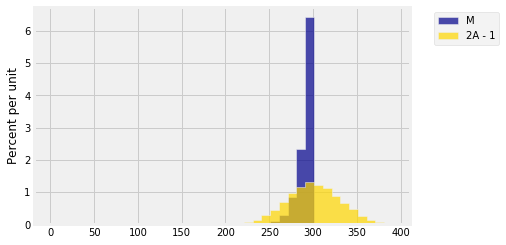

In [3]:
every_ten = np.arange(1, N+101, 10)
results.hist(bins=every_ten)

We constructed the estimator $2A - 1$ to be unbiased, and indeed its empirical distribution is symmetric around the parameter 300. The estimator $M$ is clearly biased: it can never be larger than $N$ but it can be smaller. If we just compare expectations, then $E(2A-1) = 300$ while $E(M) \ne 300$, so it seems as though $2A-1$ is the better estimate.

But the graph tells a different story, because the graph also shows the spread in each of the two distributions. The distribution of $2A-1$ is much more spread out than the distribution of $M$. The two empirical SDs differ by a factor of around 3.5:

In [4]:
np.std(maxes)

9.197597577085006

In [5]:
np.std(double_means)

31.24214193114522

This tells us that though $M$ is typically going to be below 300, it won't be below by much, whereas $2A-1$ can be quite far away from 300, underestimating about as often as it overestimates.

Perhaps now you'd prefer to use $M$ instead of $2A-1$.

This is an example of the *bias-variance tradeoff* that is common in estimation. Both expectation and SD are important in choosing one estimator over another. As in this example, the choice isn't always clear. But if the estimator with the lower SD also happens to be unbiased, then you can declare it the winner.